<center>
<h1>Факультет "Прикладная математика" МАИ</h1>
<h2>Курс "Основы Python для анализа данных"</h2>
<h2>Артамонов Игорь Михайлович</h2>
</center>

<center><h2>Занятие № 8-2. Основы поискового анализа данных (EDA) </h2></center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие № 9. Основы поискового анализа данных (EDA)</b>

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

## Исследовательский анализ данных (Exploratory Data Analysis - EDA)

#### Скорее, сочетание философии с методологей
* как мы "разбираемся" с данными
* на что в данных мы смотрим
* как мы смотрим
* как интерпретируем увиденное
* не смотря на общие методы, каждый DA вырабатывает свой "стиль"

#### Обычный порядок действий
* получить и ввести датасет
* понять, какая информация содержится в датасете ("семантика")
* понять структуру данных ("синтаксис")
* что делать с пропусками (если они  есть)
* извлечь существенные переменные
* выявить выбросы и аномалии
* сделать и проверить каки-либо предположения о данных
* определить факторное пространство (что на что и как влияет)
* выполнить отчет (если он нужен)

#### Используются
* графические средства
* отчеты и статистика
* преобразования даннных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from numpy.random import randn
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
import os
import os.path

## Загрузите данные с kaggle

### https://www.kaggle.com/c/house-prices-advanced-regression-techniques

* какие данные у нас есть?
* есть ли у нас описание?
* что от нас требуется?

нам нужны тренировочные и тестовые данные: 
* __train.csv__
* __test.csv__

In [3]:
train = pd.read_csv( os.path.join("practice_02_files", "houses", "train.csv"))
test = pd.read_csv( os.path.join("practice_02_files", "houses", "test.csv"))

In [4]:
train.shape

(1460, 81)

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## <font color=red>ЗАДАНИЕ</font>

Разделите датафрейм на 2. 
* Создайте копию исходного датафрейма (__для чего?__)
<br>(Чтобы после манипуляций с данными осталась копия в исходном виде, к которой применяется построенная модель)
* В первом __X_train__  - должны остаться все переменные, кроме целевой. 
* Во втором __y_train__ - только целевая переменная.


In [8]:
# Ваш код
train_cp = train.copy()
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

In [9]:
X_train.shape, y_train.shape

((1460, 80), (1460,))

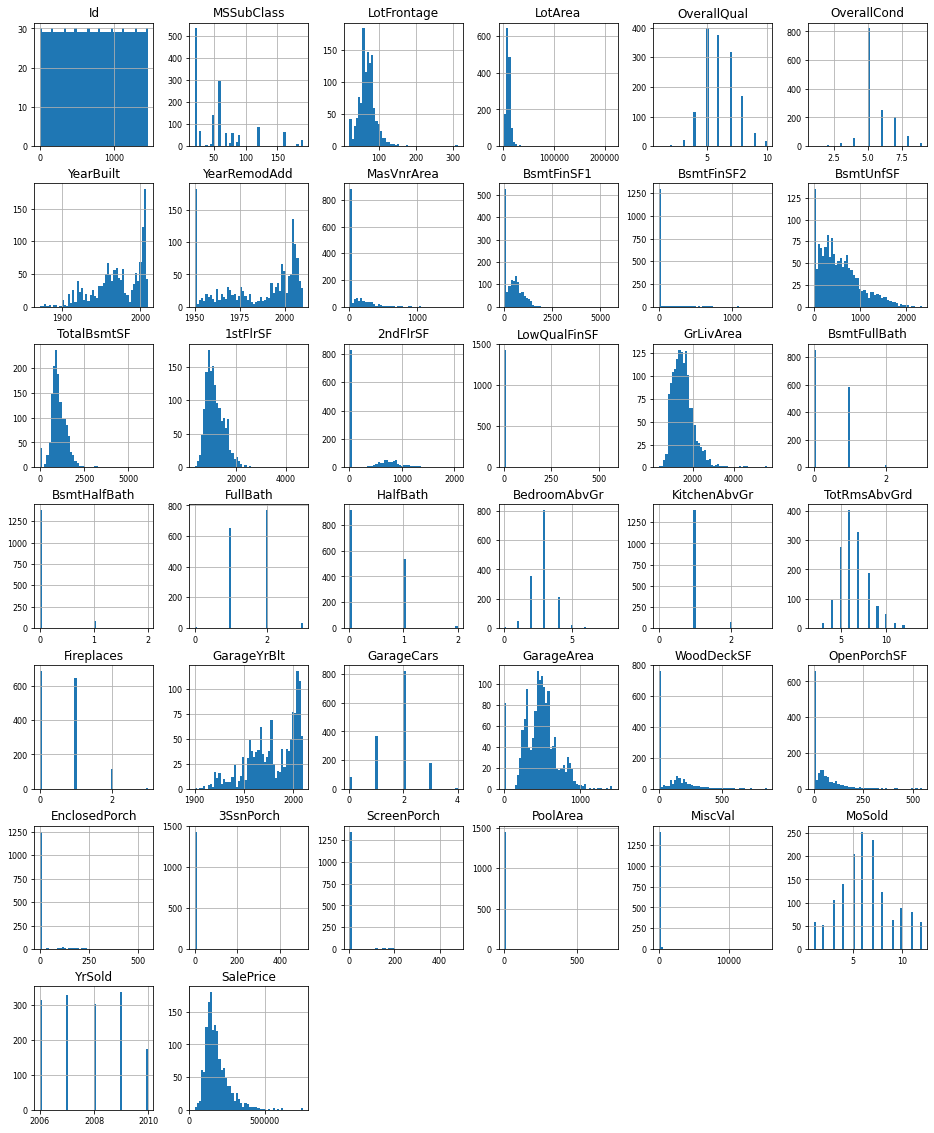

In [10]:
train.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

#### * Какие графики наиболее подозрительны на выбросы и почему?
<br>'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice'

<br> Выделенные признаки обладают нехарактерными всплесками в поведении гистограмм, а также имеют обобщающий смысл для некоторых других признаков с выбросами
#### * Постройте графики для каждой из них 

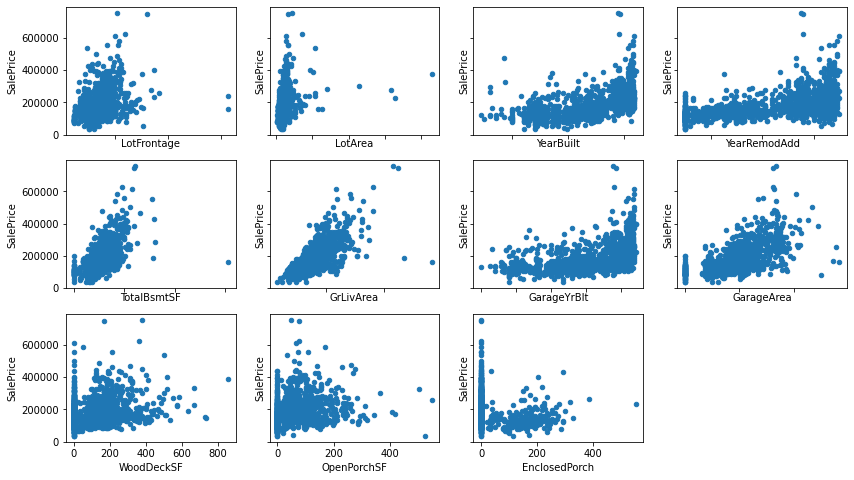

In [11]:
#Соотношение цены и выделенных признаков с выбросами по количеству их присутствия в таблице

columns = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']
plt.figure(figsize=(14,8))
for i, col in enumerate(columns):
    tmp_ax = plt.subplot(3, 4, i+1)
    if not(i & 4 == 1):
        tmp_ax.label_outer()
    train.plot(x = col, y='SalePrice', ax=tmp_ax, kind='scatter')

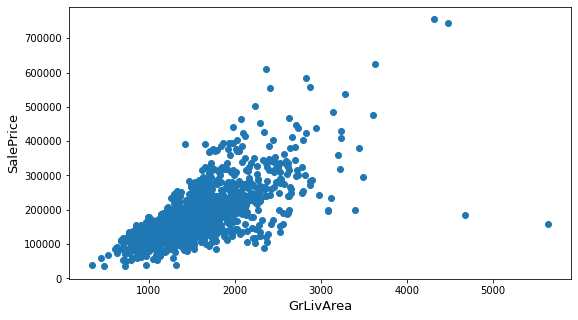

In [12]:
fig, ax = plt.subplots( figsize=(9,5))
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show();

### <font color=green>ВОПРОСЫ</font>
* Где здесь выбросы?
<br> Точки, значительно выбивающиеся из общей "кучи" или аппроксимации - выбросы
* Что с ними можно сделать
<br> Либо выкинуть из данных, либо заменить медианными значениями. Есть и другие более совершенные методы

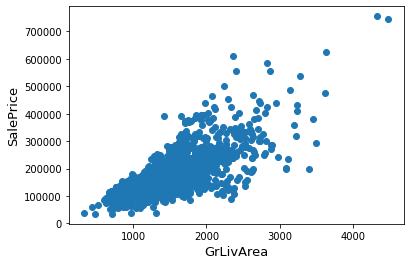

In [13]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


### <font color=green>ВОПРОС.</font> Остались ли ещё выбросы?
<br>На первый взгляд - нет

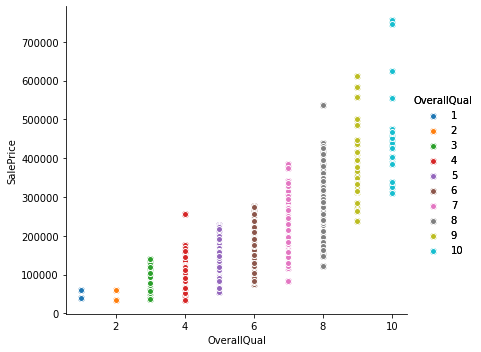

In [14]:
# Modify the graph above by assigning each species an individual color.
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
g=sns.FacetGrid(train[columns], hue="OverallQual", height=5) \
   .map(plt.scatter, "OverallQual", "SalePrice") \
   .add_legend()
g=g.map(plt.scatter, "OverallQual", "SalePrice",edgecolor="w").add_legend()
plt.show();

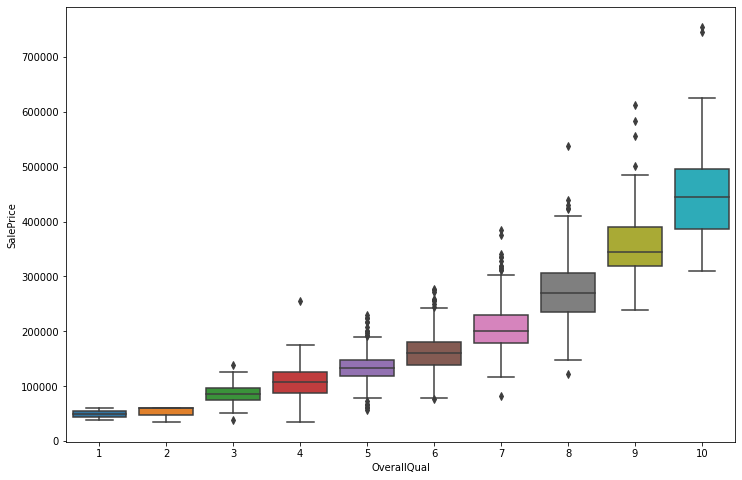

In [15]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

/Users/andreytretyakov/.local/share/virtualenvs/PythonCourse-15oCSDCF/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 180932.92 and sigma = 79467.79



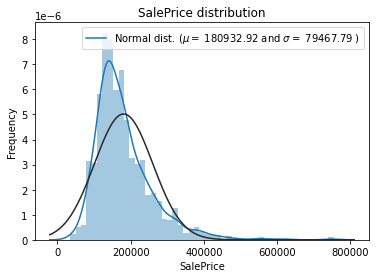

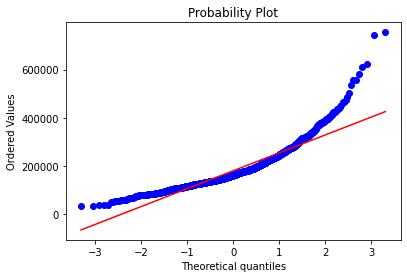

In [16]:
sns.distplot(train['SalePrice'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show();

#### <font color=green>ВОПРОС.</font>  Что можно сделать с этим? Остались ли ещё выбросы?

In [17]:
# Что сделано здесь?
train["SalePrice"] = np.log1p(train["SalePrice"])

/Users/andreytretyakov/.local/share/virtualenvs/PythonCourse-15oCSDCF/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 12.02 and sigma = 0.40



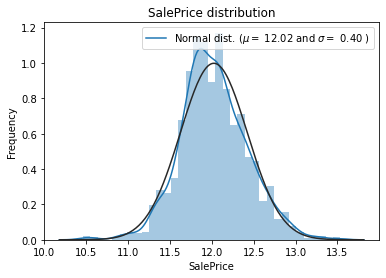

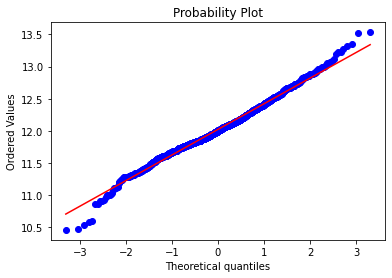

In [18]:
#Check the new distribution 
sns.distplot(train['SalePrice'], fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### <font color=green>ВОПРОС.</font> 
* Появились ли у нас новые кандидаты на выбросы? Обоснуйте.
* Как вернуться к исходным данным? 
* Надо ли возвращаться к ним в данном случае?

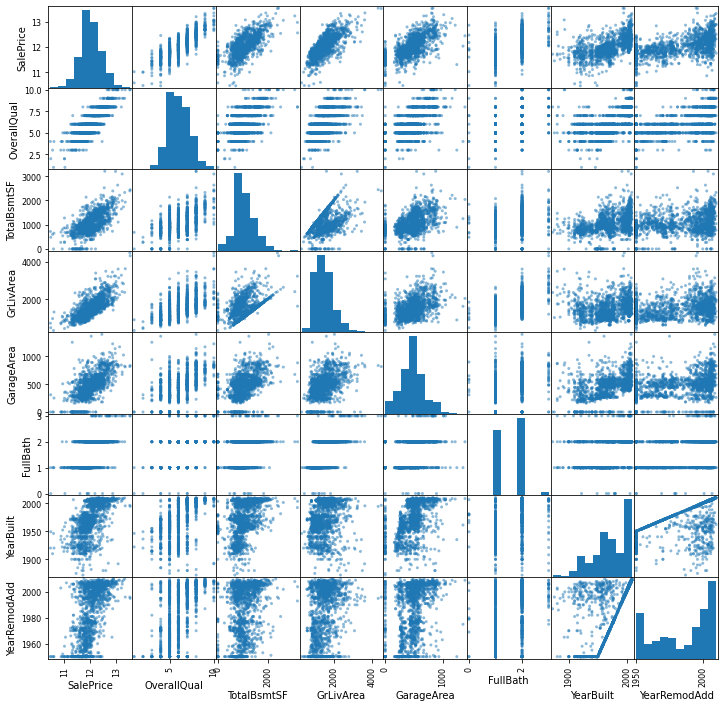

<Figure size 432x288 with 0 Axes>

In [19]:
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']

pd.plotting.scatter_matrix(train[columns],figsize=(12,12));
plt.figure();

## Очистка и подготовка данных

### Поиск пропущенных данных

In [20]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test), sort=True).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


#### <font color=green>ВОПРОС.</font>  Зачем мы это сделали?

## <font color=red>ЗАДАНИЕ</font>
* Присвойте значения массивов X_train и X_test так, чтобы они соответствовали "прежним" массивам

In [21]:
# Ваш код


### Пропущенные данные

#### <font color=green>ВОПРОС.</font>  
* Какие данные имеют пропуски? Составьте список.
* Чем мы будем их заполнять?

In [22]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

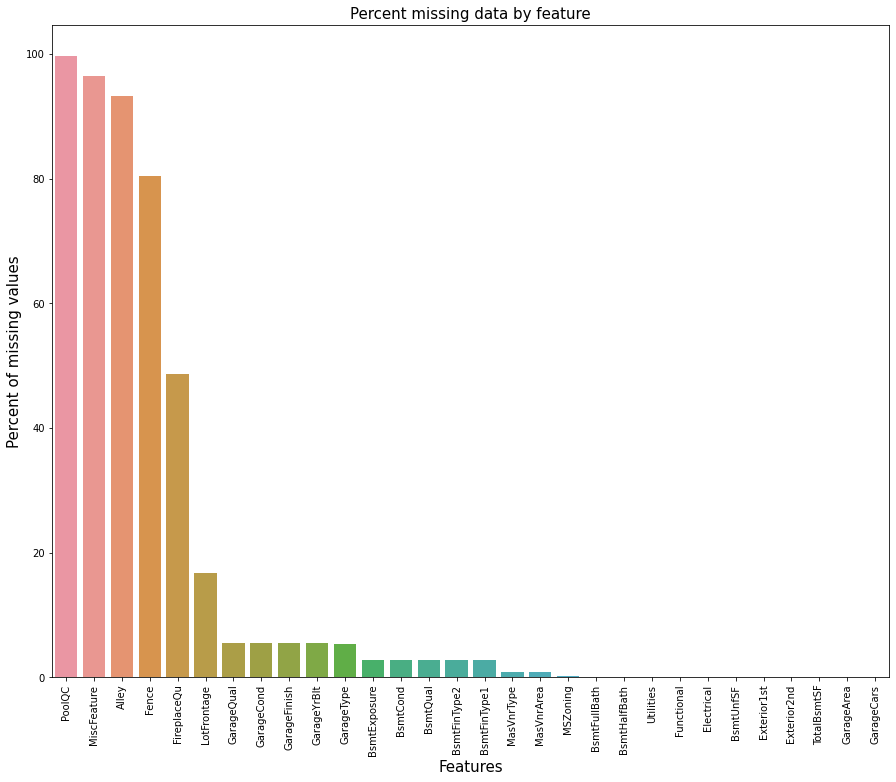

In [23]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

#### <font color=green>ВОПРОС.</font>  Являются ли значения PoolQC и MiscFeature выбросами?

<AxesSubplot:>

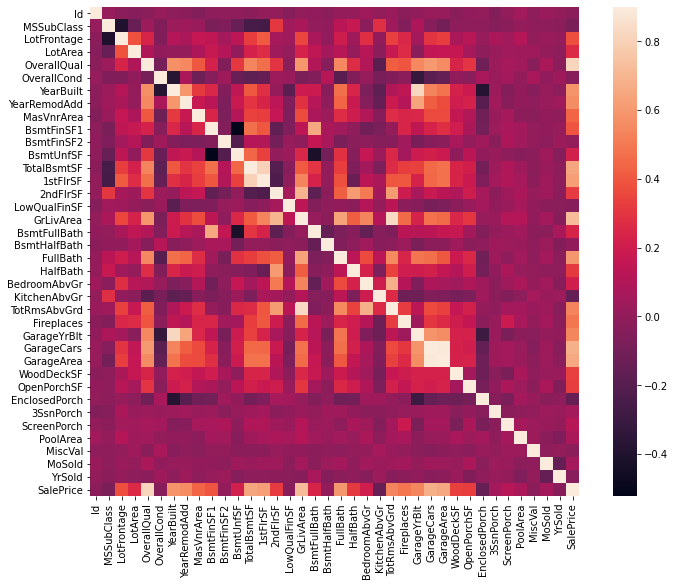

In [24]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

#### Более удобочитаемый вариант 

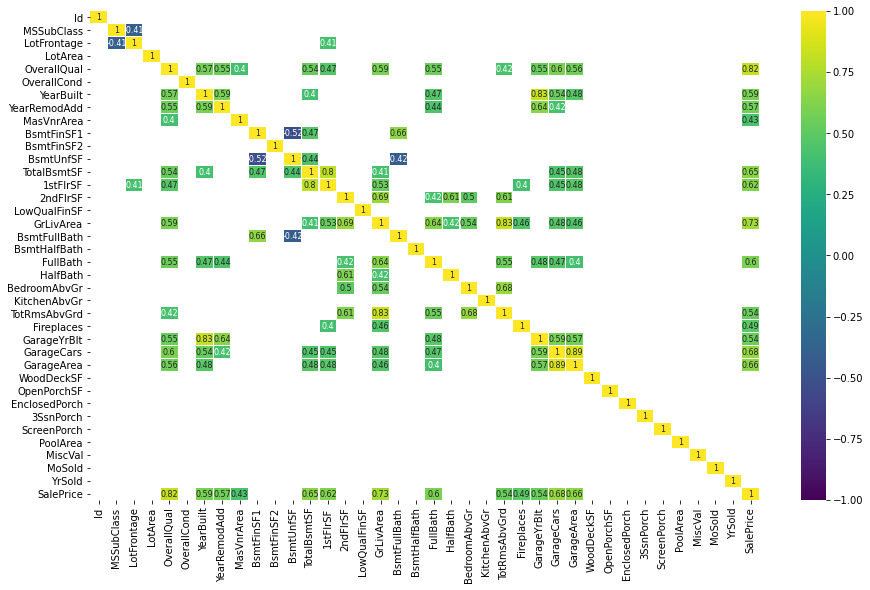

In [25]:
plt.subplots(figsize=(15,9))
sns.heatmap(corrmat[(corrmat >= 0.4) | (corrmat < -0.4)], 
            cmap='viridis',
            vmax=1.0, vmin=-1.0,
            linewidth=0.1,
            annot=True,
            annot_kws={"size":8});

### Фильтрация пропущенных данных

In [26]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [27]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [28]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [29]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [30]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [31]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [32]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [33]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [34]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [35]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [36]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [37]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#### <font color=green>ВОПРОС.</font>  Почему? Что делает mode()?
<br>Берет моду выборки, значение, которое встречается наибольшее число раз

In [38]:
all_data = all_data.drop(['Utilities'], axis=1)

#### <font color=green>ВОПРОС.</font>  Почему?

In [39]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [40]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [41]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [42]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [43]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [44]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

### Проверяем, остались ли не заполненные данные?

In [45]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


#### <font color=green>ВОПРОС.</font>  Какие численные значения можно преобразовать в категориальные?

In [46]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 79)


#### <font color=green>ВОПРОС.</font>  Можно ли найти сложные / составные признаки?

In [47]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Признаки со смещенным распределением

In [48]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [49]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 60 skewed numerical features to Box Cox transform


In [50]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 221)


In [51]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       ...
       'SaleCondition_Partial', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=221)

In [52]:
train = all_data[:ntrain]
test = all_data[ntrain:]

### Рекомендуется посмотреть

https://www.kaggle.com/mjbahmani/machine-learning-workflow-for-house-prices

## <font color="blue">Практическое задание</font>

 www.kaggle.com/c/titanic

Выполните EDA <b>по приведенному ранее образцу</b> для данного датасета. Перед каждой ячейкой должен быть комментарий в строке типа Makrdown, 
говорящей, что выполняется и почему.

### понять, какая информация содержится в датасете ("семантика")
<br>Вывод общей информации о датасете (размерность, названия колонок и их тип)

In [53]:
df_train = pd.read_csv( os.path.join("practice_02_files", "titanic", "train.csv"))
df_test = pd.read_csv( os.path.join("practice_02_files", "titanic", "test.csv"))
print(df_train.info(), df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [54]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### что делать с пропусками (если они есть)
<br>На сводке видно, что есть признаки, значения которых не указаны
<br>Вывод долей пропусков в данных

In [55]:
missing = pd.DataFrame({'Train' :  df_train.isnull().sum(), 'Test' : df_test.isnull().sum()})
missing.drop(missing[(missing == 0).all(axis=1) | missing.isnull().any(axis=1)].index, axis=0, inplace=True)
missing['train_miss_ratio'] = missing['Train'] / len(df_train)
missing['test_miss_ratio'] = missing['Test'] / len(df_test)
missing

,Train,Test,train_miss_ratio,test_miss_ratio
Age,177,86.0,0.198653,0.205742
Cabin,687,327.0,0.771044,0.782297
Embarked,2,0.0,0.002245,0.000000
Fare,0,1.0,0.000000,0.002392


* Данные с номером каюты в большинстве своем неизвестны - с этим признаком работать вряд ли получится в обоих наборах
* Embarked - ограниченный набор пунктов, в котором пассажир сел на "Титаник"; в тренировчоных данных имеет очень малое количество пропусков, которые можно заменить наиболее часто-встречающимся значением
* Чтобы заполнить пробелы в возрасте пассажиров - необходимо более детально проанализировать данный признак, т.к. заполнение, например, общевыборочным медианным значением при таком значительном количестве пропусков не выглядит оптимальным решением, но сначала выведем гистограммы возраста пассажиров по целевому признаку "Survived" для значений, которые определены (т.е. > 0)
* Fare - тариф, который скорее всего связан с возрастом пассажира и классом каюты. В тестовых данных пропуск всего один, но во избежание выбросов требуется аккуратный подход. Его лучше заполнять после Age

In [56]:
df_train.drop(['Cabin', 'PassengerId'], axis=1, inplace=True)
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [57]:
df_train['Embarked'].fillna(value='S', inplace=True)

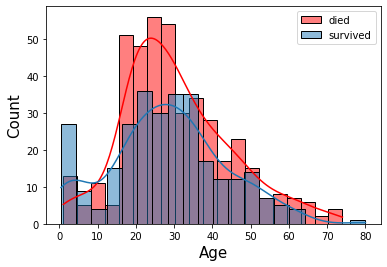

In [58]:
age_dead = df_train["Age"][(df_train["Age"].notnull()) & (df_train["Survived"] == 0)]
age_surv = df_train["Age"][(df_train["Age"].notnull()) & (df_train["Survived"] == 1)]
sns.histplot(age_dead, bins=20, color='r', label="died", kde=True)#stat='probability'
sns.histplot(age_surv, bins=20, label="survived", kde=True)#stat='probability'
plt.xlabel("Age",fontsize=15)
plt.ylabel("Count",fontsize=15)
#plt.ylabel("Probability",fontsize=15)
plt.legend()
plt.show();

In [59]:
descr = df_train["Age"].describe()
descr["median"] = df_train["Age"].median()
descr

count     714.000000
mean       29.699118
std        14.526497
min         0.420000
25%        20.125000
50%        28.000000
75%        38.000000
max        80.000000
median     28.000000
Name: Age, dtype: float64

In [60]:
grouped = df_train.groupby(['Sex', 'Pclass'])['Age']
descr = grouped.describe()
descr['median'] = grouped.median()
descr

count       mean        std   min     25%   50%    75%   max  \
Sex    Pclass                                                                 
female 1        85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0   
       2        74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0   
       3       102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0   
male   1       101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0   
       2        99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0   
       3       253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0   

               median  
Sex    Pclass          
female 1         35.0  
       2         28.0  
       3         21.5  
male   1         40.0  
       2         30.0  
       3         25.0

Заполняем пропуски в исходном датасете медианой выделенных групп

In [61]:
df_train.loc[df_train.Age.isnull(), 'Age'] = grouped.transform('median')
df_train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### извлечь существенные переменные, сделать и проверить какие-либо предположения о данных
Построим предыдущую гистограмму с заполненными полностью данными, а также построим инфографику по разным группам выживших

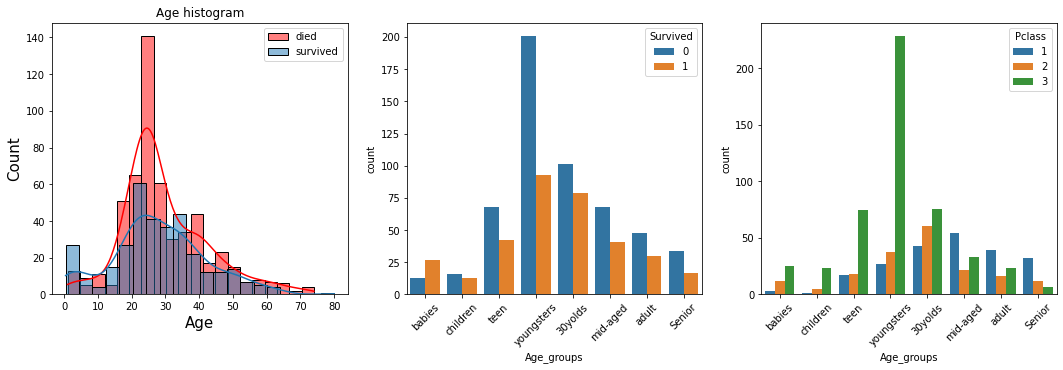

In [62]:
age_grps = [0, 4, 12, 20, 27, 35, 42, 52, 90]
grps = ['babies', 'children', 'teen', 'youngsters', '30yolds','mid-aged', 'adult', 'Senior']

df_train['Age_groups'] = pd.cut(df_train['Age'], age_grps, labels=grps)

fig = plt.figure(figsize=(18, 5))

ax_hist = plt.subplot(1,3,1)
sns.histplot(df_train["Age"][df_train["Survived"] == 0], bins=20, color='r', label="died", kde=True, ax=ax_hist)
sns.histplot(df_train["Age"][df_train["Survived"] == 1], bins=20, label="survived", kde=True, ax=ax_hist)
ax_hist.set_xlabel("Age",fontsize=15)
ax_hist.set_ylabel("Count",fontsize=15)
ax_hist.set_title("Age histogram")
ax_hist.legend()

ax_grps = plt.subplot(1,3,2)
ax_grps.tick_params(axis='x', labelrotation=45)
sns.countplot(x=df_train['Age_groups'], data=df_train, hue="Survived", ax=ax_grps)

ax_class = plt.subplot(1,3,3)
ax_class.tick_params(axis='x', labelrotation=45)
sns.countplot(x=df_train['Age_groups'], data=df_train, hue="Pclass", ax=ax_class)
plt.show();

* На гистограмме заметны участки, которые показывают влияние возрастного фактора на конечный исход, например, большинство из групп до 8-ми лет и 12-16 лет выжили, а группы людей большого возраста и новорожденные вообще в полном составе
* Есть выбивающиеся из общей тенденции участки с большинством выживших в группе среднего возраста и, наоборот, с погибшими детьми 8-12 лет. Потому что помимо возраста на шансы выжить должны били влиять и другие факторы, например пол или класс каюты (см mid-aged/Pclass и mid-aged/Survived)
* Очевидно, что в самом дешевом классе плыли по большей части молодые люди, во 2-м - люди среднего возраста, в первый класс был самым возрастным

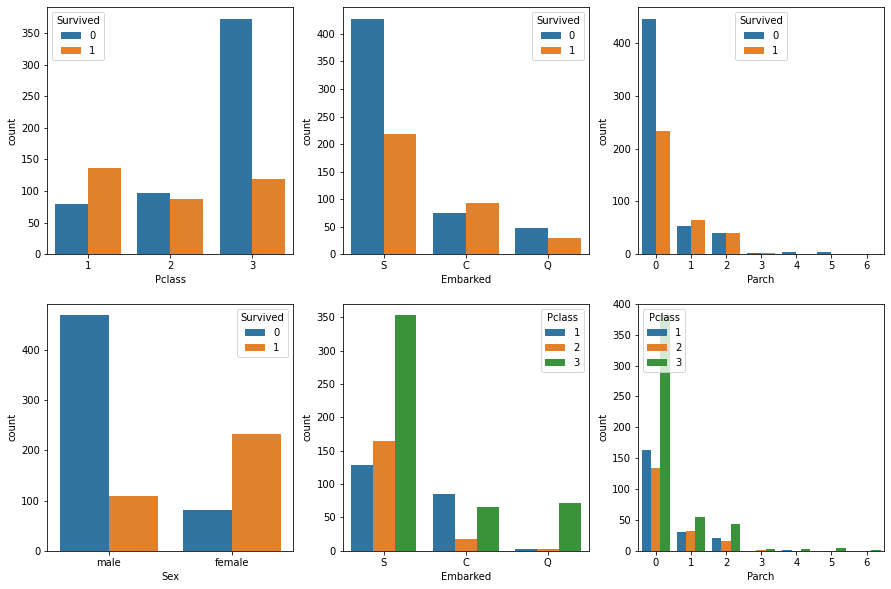

In [63]:
fig = plt.figure(figsize=(15, 10))

ax_cls_surv = plt.subplot(2,3,1)
sns.countplot(x=df_train['Pclass'], data=df_train, hue='Survived', ax=ax_cls_surv)

ax_embrkd = plt.subplot(2,3,2)
sns.countplot(x=df_train['Embarked'], data=df_train, hue='Survived', ax=ax_embrkd)

ax_family = plt.subplot(2,3,3)
sns.countplot(x=df_train['Parch'], data=df_train, hue='Survived', ax=ax_family)

ax_sex_surv = plt.subplot(2,3,4)
sns.countplot(x=df_train['Sex'], data=df_train, hue='Survived', ax=ax_sex_surv)

ax_embrkd = plt.subplot(2,3,5)
sns.countplot(x=df_train['Embarked'], data=df_train, hue='Pclass', ax=ax_embrkd)

ax_fam_class = plt.subplot(2,3,6)
sns.countplot(x=df_train['Parch'], data=df_train, hue='Pclass', ax=ax_fam_class)

plt.show();

* Выжила большая доля людей из небольших смей (скорее всего дети и женщины)
* Интересно, что большинство зашедших на борт Титаника в Cherbourg выжило, а большинство пассажиров, севших в Cherbourg - пассажиры первого класса

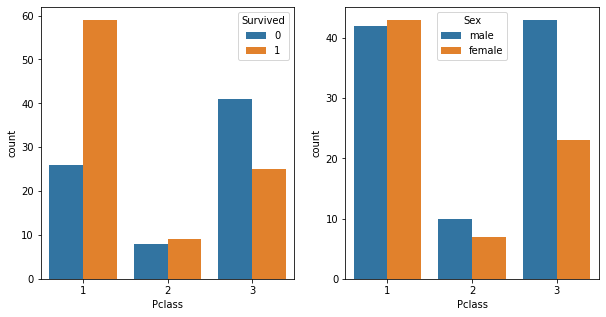

In [64]:
fig = plt.figure(figsize=(10,5))
ax_1 = plt.subplot(1,2,1)
sns.countplot(x=df_train[df_train['Embarked']=='C']['Pclass'], data=df_train, hue='Survived', ax=ax_1)

ax_2 = plt.subplot(1,2,2)
sns.countplot(x=df_train[df_train['Embarked']=='C']['Pclass'], data=df_train, hue='Sex', ax=ax_2);

### определить факторное пространство

Попарная корреляция всех факторов. Предварительно сведем многие категориальные факторы (напр. "Sex" ) в числовой вид 

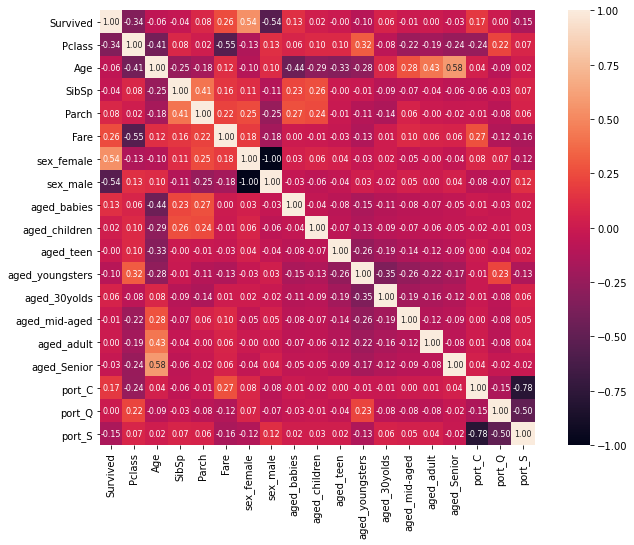

In [65]:
dummy = pd.get_dummies(df_train, columns=['Sex','Age_groups','Embarked'], prefix=['sex', 'aged', 'port'])
df_joined = df_train.merge(dummy)
plt.subplots(figsize=(12,8))
sns.heatmap(df_joined.corr(), fmt = '.2f', vmax=1.0, square=True, annot=True, annot_kws = {'size':8})
plt.show();

## Экзаменационные вопросы:

* EDA, её назначение и типовая структура